## Informações sobre o aluno:

Nomes: Artur Matos Andrade Novais e Gustavo Luiz Bueno Pereira

Matrícula: 202202431 e 202202444

# Questão 1

Você foi convidado para participar de um projeto de uma empresa BIA Technologies, uma empresa voltada para o comércio de jogos para video-games e computadores. Esse projeto conta com uma equipe de sistemas de recomendação, na qual você foi convidado a participar. Dessa forma, você irá auxiliar o desenvolvimento de um sistema de recomendação para essa empresa.

Considere o dataset fornecido pela empresa e faça uma análise básica desse dataset. Em seguida, utilize seus conhecimentos para desenvolver e avaliar três diferentes sistemas de recomendação da seguinte forma:

a) Desenvolva um sistema de recomendação utilizando filtragem colaborativa (sem realizar a redução da dimensionalidade dos dados);

b) Desenvolva um sistema de recomendação baseado em conteúdo (sem realizar a redução da dimensionalidade dos dados);

c) Desenvolva um sistema de recomendação utilizando a redução da dimensionalidade dos dados.

Forneça as métricas de avaliações para cada um dos sistemas. Conclua suas observações de forma a convencer o gestor do projeto sobre qual foi o melhor sistema de recomendação obtido até o momento.

**Entrega da resolução da prova: dia 03/12/2024 até as 23:59, via SIGAA.**

**Obs.:** A outra equipe de sistemas de recomendação da empresa BIA Technologies apresentou uma solução atingindo as métricas abaixo. Seu sistema deverá fornecer métricas melhores que as obtidas pela outra equipe (baseline):

'ndcg@5' = 0.0016818836315317604

'ndcg@10' = 0.003073280417540927

'precision@5' = 0.00016758439071103669

'precision@10' = 8.379219535551834e-05

# Conjunto de Dados

## Carregar

In [1]:
import os
import json
import gzip 
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
"""BAIXAR PASTA DO VECTORSTORE PARA NÃO TER QUE RODAR NOVAMENTE"""
"""DEIXAR COMO "data/vectorstore""""
#https://drive.google.com/drive/folders/1mcMRBIPojeWlThJX3aQ8Q8-scLWJN68A?usp=sharing

In [2]:
# !wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Video_Games_5.json.gz

In [3]:
# !wget https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/metaFiles2/meta_Video_Games.json.gz

In [4]:
def load_file(file_name):
    data = []
    with gzip.open(file_name) as f:
        for l in f:
            data.append(json.loads(l.strip()))

    print(file_name, len(data))
    df = pd.DataFrame.from_dict(data)
    return df

reviews_df = load_file("Video_Games_5.json.gz")
metadata_df = load_file("meta_Video_Games.json.gz")

Video_Games_5.json.gz 497577
meta_Video_Games.json.gz 84819


## Descrição das colunas

- reviewerID - ID do avaliador, por exemplo, A2SUAM1J3GNN3B
- asin - ID do produto, por exemplo, 0000013714
- reviewerName - nome do avaliador
- vote - votos úteis da avaliação
- style - um dicionário dos metadados do produto, por exemplo, "Formato" é "Capa Dura"
- reviewText - texto da avaliação
- overall - classificação do produto
- summary - resumo da avaliação
- unixReviewTime - tempo da avaliação (tempo Unix)
- reviewTime - tempo da avaliação (formato original)
- image - imagens que os usuários postam após receberem o produto

In [5]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


- asin - ID do produto, por exemplo, 0000031852
- title - nome do produto
- feature - características do produto em formato de lista de itens
- description - descrição do produto
- price - preço em dólares americanos (no momento da coleta de dados)
- imageURL - URL da imagem do produto
- imageURLHighRes - URL da imagem do produto em alta resolução
- related - produtos relacionados (também comprados, também visualizados comprados juntos, comprar após visualizar)
- salesRank - informações do ranking de vendas
- brand - nome da marca
- categories - lista de categorias às quais o produto pertence
- tech1 - primeira tabela de detalhes técnicos do produto
- tech2 - segunda tabela de detalhes técnicos do produto
- similar - tabela de produtos similares

In [6]:
metadata_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,[],,street fighter 2 II turbo super nintendo snes ...,[],,Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,,,$0.72,0276425316,[],[],NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,,Xbox 360 MAS STICK,[],,by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Video Games, PC, Games, </span></span></span>...",,"[Phonics Alive! 3, The Speller teaches student...",,Phonics Alive! 3: The Speller,[],,by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


Note que o dataset é muito grande e certas manipulações podem não caber na memória RAM. Além disso, alguns desses dados podem ser de baixa qualidade. Esses dados podem ser filtrados e você pode considerar apenas os dados de maior qualidade. Alguns filtros básicos:

## **Análise e preparação dos dados (0,5 pontos)**

### Análise dos dados

#### Reviews

In [7]:
reviews_df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4.0,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3.0,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2.0,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5.0,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [8]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497577 entries, 0 to 497576
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   overall         497577 non-null  float64
 1   verified        497577 non-null  bool   
 2   reviewTime      497577 non-null  object 
 3   reviewerID      497577 non-null  object 
 4   asin            497577 non-null  object 
 5   reviewerName    497501 non-null  object 
 6   reviewText      497419 non-null  object 
 7   summary         497468 non-null  object 
 8   unixReviewTime  497577 non-null  int64  
 9   vote            107793 non-null  object 
 10  style           289237 non-null  object 
 11  image           3634 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 42.2+ MB


In [9]:
'''Quantas pessoas diferentes temos? e quantos itens diferentes temos?'''

pessoas_diferentes = reviews_df['reviewerName'].nunique()
itens_diferentes = reviews_df['asin'].nunique()

print(f"O número de pessoas diferentes que fizeram reviews é {pessoas_diferentes}")
print(f"O número de itens diferentes que foram avaliados é {itens_diferentes}")


O número de pessoas diferentes que fizeram reviews é 45943
O número de itens diferentes que foram avaliados é 17408


In [10]:
'''Será que uma pessoa avaliou o mesmo item duas vezes?'''

duplicated_df = reviews_df[reviews_df[['reviewerID', 'asin']].duplicated(keep=False)]
duplicated_df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
968,5.0,False,"05 3, 2007",A1CDNTB7377YH2,B00000DMAQ,Michael A. Newman,I really love this game that is quite similar ...,What a great game!,1178150400,NaN,NaN,NaN
969,5.0,False,"05 3, 2007",A1CDNTB7377YH2,B00000DMAQ,Michael A. Newman,I really love this game that is quite similar ...,A Whole Lot of Fun,1178150400,NaN,NaN,NaN
2407,5.0,False,"01 4, 2012",AROWZGGO4VTJU,B00000INR2,Cosmic Soujourner,I have used third party products for everythin...,Stick With First Party Hardware,1325635200,3,NaN,NaN
2408,1.0,False,"01 4, 2012",AROWZGGO4VTJU,B00000INR2,Cosmic Soujourner,I have used many third party expansion packs a...,Beware Of Third Party Expansion Paks,1325635200,NaN,NaN,NaN
2409,1.0,False,"01 4, 2012",AROWZGGO4VTJU,B00000INR2,Cosmic Soujourner,I have used a lot of third party expansion pac...,Buy Only Nintendo Brand Expansion Pak,1325635200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
495475,5.0,True,"08 13, 2018",A8J2YHESWGF2E,B014P7QI6I,Amazoncustomer,I use mine on a Raspberry Pi 3 Model B and it ...,Works on Raspberry Pi and PC,1534118400,NaN,{'Color:': ' Black17'},NaN
495476,5.0,True,"08 13, 2018",A8J2YHESWGF2E,B014P7QI6I,Amazoncustomer,"This is a great product, my son wanted a contr...",Great Product,1534118400,NaN,{'Color:': ' Black16'},NaN
495477,5.0,True,"08 13, 2018",A8J2YHESWGF2E,B014P7QI6I,Amazoncustomer,my son informs me this is a good controller lo...,Five Stars,1534118400,NaN,{'Color:': ' Black15'},NaN
495478,5.0,True,"08 13, 2018",A8J2YHESWGF2E,B014P7QI6I,Amazoncustomer,"Been looking at Steam Controllers, but they're...",Awesome little controller!,1534118400,NaN,{'Color:': ' Black14'},NaN


Vemos que isso ocorre, e ocorre inclusive com uma frequência alta, será que as notas mudam?

In [11]:
differences_in_overall = (
    duplicated_df.groupby(['reviewerID', 'asin'])['overall']
    .nunique()
    .reset_index(name='unique_overall_count')
)

different_overall = differences_in_overall[differences_in_overall['unique_overall_count'] > 1]
different_overall

,reviewerID,asin,unique_overall_count
287,A11LS12ZU93SV6,B000035Y3N,2
1060,A15Q3UMYRVA2L1,B000P46NMA,2
1210,A16GNQDN6KZ5WV,B00W8FYFBA,2
1257,A16UJ76AFPJGEX,B0009XILEA,2
1476,A18BQH0PD920T,B000P46NMK,2
...,...,...,...
22932,AU4HL7JWM5X34,B0050SYZS0,2
23001,AUOHOKWCO975I,B005THAX60,2
23072,AV0QFE2E56WHL,B005DKMC6M,2
23138,AVB96V97JZFWK,B00AAS888S,2


Temos então 133 casos em que a nota de um usuário para um mesmo produto muda.

Ter multiplas versões de avaliação (mesmo cliente com mesmo produto) pode não ser tão interessante, podemos seguir algumas estratégias:

- Tirar uma média
- Selecionar a última (temos a informação de tempo)

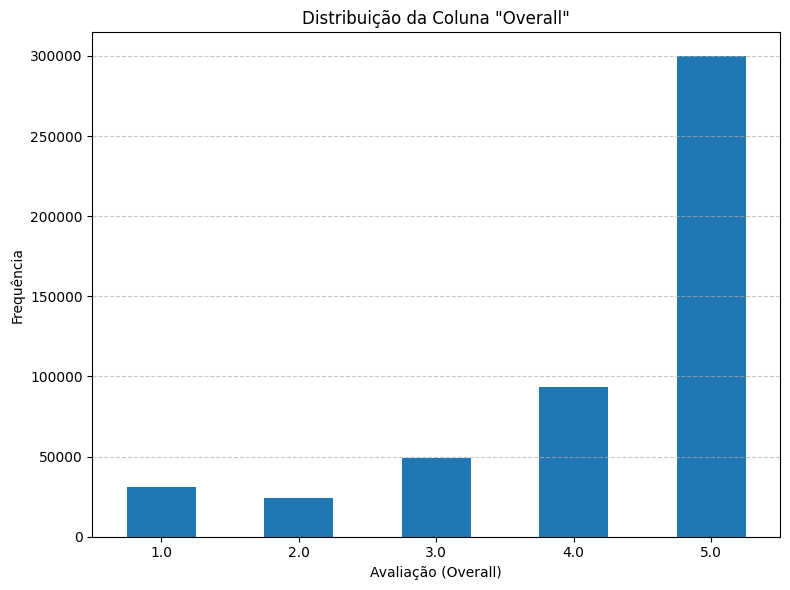

In [12]:
'''Como será que está a distribuição das notas?'''

plt.figure(figsize=(8, 6))
reviews_df['overall'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribuição da Coluna "Overall"')
plt.xlabel('Avaliação (Overall)')
plt.ylabel('Frequência')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [13]:
'''Como estão os nulos do dataset?'''

nulos_por_coluna = reviews_df.isnull().sum()

colunas_com_nulos = nulos_por_coluna[nulos_por_coluna > 0]

print("Colunas com valores nulos e suas quantidades:")
print(colunas_com_nulos)

Colunas com valores nulos e suas quantidades:
reviewerName        76
reviewText         158
summary            109
vote            389784
style           208340
image           493943
dtype: int64


#### Metadados

In [14]:
metadata_df.head()

,category,tech1,description,fit,title,also_buy,tech2,brand,feature,rank,also_view,main_cat,similar_item,date,price,asin,imageURL,imageURLHighRes,details
0,"[Video Games, PC, Games]",,[],,Reversi Sensory Challenger,[],,Fidelity Electronics,[],"[>#2,623,937 in Toys &amp; Games (See Top 100 ...",[],Toys &amp; Games,,,,0042000742,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
1,"[Video Games, Xbox 360, Games, </span></span><...",,[Brand new sealed!],,Medal of Honor: Warfighter - Includes Battlefi...,[B00PADROYW],,by\n \n EA Games,[],"[>#67,231 in Video Games (See Top 100 in Video...","[B0050SY5BM, B072NQJCW5, B000TI836G, B002SRSQ7...",Video Games,,,"\n\t\t\t\t\t\t\t\t\t\t\t\t<span class=""vertica...",0078764343,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
2,"[Video Games, Retro Gaming & Microconsoles, Su...",,[],,street fighter 2 II turbo super nintendo snes ...,[],,Nintendo,[],"[>#134,433 in Video Games (See Top 100 in Vide...",[],Video Games,,,$0.72,0276425316,[],[],NaN
3,"[Video Games, Xbox 360, Accessories, Controlle...",,[MAS's Pro Xbox 360 Stick (Perfect 360 Stick) ...,,Xbox 360 MAS STICK,[],,by\n \n MAS SYSTEMS,[Original PCB used from Xbox 360 Control Pad (...,"[>#105,263 in Video Games (See Top 100 in Vide...",[],Video Games,,,,0324411812,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN
4,"[Video Games, PC, Games, </span></span></span>...",,"[Phonics Alive! 3, The Speller teaches student...",,Phonics Alive! 3: The Speller,[],,by\n \n Advanced Software Pty. Ltd.,"[Grades 2-12, Spelling Program, Teaches Spelli...","[>#92,397 in Video Games (See Top 100 in Video...",[B000BCZ7U0],Video Games,,,,0439335310,[https://images-na.ssl-images-amazon.com/image...,[https://images-na.ssl-images-amazon.com/image...,NaN


In [ ]:
'''Vamos separar primeiro as colunas relevantes baseado em suas descrições e em uma exploração inicial do dataset, que considera tipo dos dados, quantidade de nulos e outros aspectos.

SEGUE ABAIXO AS JUSTIFICATIVAS:

 A coluna "details" possui informações muito específicas do produto, e são poucas que estão realmente preenchidas (1968). 
 Até tem algumas informações úteis como linguagem do livro, mas seria mais esforço por pouca informação. Então, vamos remove-la.
 
 As especificações técncias dos produtos estão extremamente mal extraídos, ainda em HTML
 Acredtito que retirar do HTML e organizar em uma lista seria muito trabalho para pouca informação
 relevante, então vamos remover essas colunas.
 
 Fit está vazio, então vamos deletar
 
 Não usaremos colunas referentes a imagem do produto nesse dataset, pois essas informações não serão exploradas
 
 Vamos retirar a coluna "main_cat", que é "categoria principal", pois é redundante à coluna de categorias. Para esse sistema, vamos considerar todas as categorias, não só as principais
 
 Como nosso objetivo é fazer um sistema de recomendação, vamos retirar as colunas que são originadas de uma recomendação (also_buy e also_view)
 
 A coluna de data não será relevante para esse contexto
 
 Usar preço de forma relevante é uma tarefa complicada que exige um tratamento muito cuidadoso. Pode ser útil para segmentar diferentes poderes de compras: ex: 
 um usuário que compra um fone airpod é bem diferente de um que compra um fone qcy -> um prefere produtos top de linha e tem poder aquisitivo para isso, e outro prefere produtos mais custo-benefício. 
 O problema é que seria necessario segmentar o preço por tipo de produto, pois é claro que, por exemplo, um celular é muito mais caro que um jogo de video game. 
 Por conta da necessidade desse tratamento mais complexo, vamos remover essa coluna.
 
 Analisando algumas amostras, percebemos que a coluna 'feature", que adiciona alguma descrição sobre o produto, já vem junto com a coluna "category", justamente por erro de extração. Quando a coluna feature está preenchida, o registro de category vem com <span> do HTMl, e logo em baixo vem o texto da feature. 
 Como achamos ela consideravelmente útil, e vamos utilizar uma abordagem de embedding, vamos apenas limpar o resto de HTML, e utilizar a category como se estivesse concatenada com a feature. Considerando "description" como um excesso de informações desnecessárias sobre o produto, vamos retirar.

 A coluna rank poderia ser útil a primeiro momento, visto que poderia ser utilizado algum tipo ponderação na recomendação considerando a popularidade do produto. No entanto, o rank atualiza periodicamente, e não sabemos se todos os produtos foram extraídos no mesmo momento, onde o rank estava coerente para todos. Além disso, é mais complicado fazer esse tipo de ponderação quando temos diferentes ranks para diferentes categorias. Por isso, vamos retirar essa coluna.
 '''

df_metadata = metadata_df.copy()

df_metadata = df_metadata[['title', 'asin', 'category', 'brand']]


In [16]:
df_metadata.head()

,title,asin,category,brand,rank
0,Reversi Sensory Challenger,0042000742,"[Video Games, PC, Games]",Fidelity Electronics,"[>#2,623,937 in Toys &amp; Games (See Top 100 ..."
1,Medal of Honor: Warfighter - Includes Battlefi...,0078764343,"[Video Games, Xbox 360, Games, </span></span><...",by\n \n EA Games,"[>#67,231 in Video Games (See Top 100 in Video..."
2,street fighter 2 II turbo super nintendo snes ...,0276425316,"[Video Games, Retro Gaming & Microconsoles, Su...",Nintendo,"[>#134,433 in Video Games (See Top 100 in Vide..."
3,Xbox 360 MAS STICK,0324411812,"[Video Games, Xbox 360, Accessories, Controlle...",by\n \n MAS SYSTEMS,"[>#105,263 in Video Games (See Top 100 in Vide..."
4,Phonics Alive! 3: The Speller,0439335310,"[Video Games, PC, Games, </span></span></span>...",by\n \n Advanced Software Pty. Ltd.,"[>#92,397 in Video Games (See Top 100 in Video..."


### Preparação dos dados

#### Reviews

In [17]:
reviews_df_filtrado = reviews_df.copy()

In [18]:
'''
Vamos lidar com esses nulos usando algumas estratégias:

- Para a coluna de nome, vamos inputar seu id em formato string
- Para a coluna de text e summary, vamos inputar as linhas faltantes, pois embora relevantes, não são essenciais. Vamos inputar text com "unknown" e summary com "unknown" também.

- Para style vamos inputar {} nas colunas nulas, caso precisemos dessa informaç'ao posteriormente
- Pata Image, vamos inputar 0 nas nulas e 1 nas que possuem algo, como não vamos analisar a imagem, ao menos a informação de se foi ou não inserida uma imagem na avaliação, pode fazer sentido.

- Para vote, vamos considerar os Nan como 0, ou seja, ninguem votou o review como útil, informação inclusive que pode ser utilizada para tentar estimar ""credibilidade""
'''

#Pensamos que os reviewerName nulos poderiam ser preenchidos pegando seu reviewerID, e preenchendo com base em outros registros com esse ID, na hipótese de ser apenas um erro de coleta. 
# Mas todos os registros com os IDs desses nulos, de fato, estão com o nome nulo. 
# No entanto, como os outros campos são válidos e seu ID também, é interessante apenas preencher com o seu id para não perder esses registros.

reviews_df_filtrado.loc[:, 'reviewerName'] = reviews_df_filtrado['reviewerName'].fillna(reviews_df['reviewerID'])

reviews_df_filtrado.fillna({'reviewText': 'unknown', 'summary': 'unknown'}, inplace=True)

reviews_df_filtrado.loc[:, 'style'] = reviews_df_filtrado['style'].apply(lambda x: x if pd.notnull(x) else {})

reviews_df_filtrado.loc[:, 'image'] = reviews_df_filtrado['image'].notnull().astype(int)

reviews_df_filtrado.loc[:, 'vote'] = reviews_df_filtrado['vote'].fillna(0)

In [19]:
'''# A coluna 'vote' é do tipo object, mas deveria ser do tipo int. Isso acontece porque para números maiores que 1000, o separador de milhar é uma vírgula. 
Então, vamos remover as vírgulas e converter a coluna para int.'''

reviews_df_filtrado.loc[:, 'vote'] = reviews_df_filtrado['vote'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x)
reviews_df_filtrado['vote'] = reviews_df_filtrado['vote'].astype(int)


'''vamos converter a coluna 'overall' para int também, é desnecessariamente float'''
reviews_df_filtrado['overall'] = reviews_df_filtrado['overall'].astype(int)

In [20]:
reviews_df_filtrado.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,0,{},0
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,0,{},0
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,0,{},0
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,0,{},0
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,0,{},0


Por já ser um número inteiro, se formos manipularmos datas, vamos utilizar unixReviewTime, e posteriormente retirar reviewTime por ser uma coluna duplicada em relação a ela. Não vamos retirar agora para auxiliar na interpretação dos dados, visto que unix não é bom para isso

In [21]:
'''Agora vamos retirar os registros com informações reduzidas em relaçaõ ao dataset de produtos, visto que não teremos as informações deles'''

reviews_df_filtrado = reviews_df_filtrado[reviews_df_filtrado['asin'].isin(metadata_df['asin'])]

In [22]:
'''Vamos tratar o dataset para que tenhamos apenas um par ReviewerID e ASIN, para isso, iremos utilizar o último review de cada usuário para cada produto, pois temos a seguinte hipótese:

O último review revela o verdadeiro sentimento do usuário em relação ao produto, pois ele já teve tempo de usar o produto e formar uma opinião mais concreta.

Isso será feito usando a coluna de unixReviewTime, que é a data do review em formato unix timestamp, que carrega informação de dia, hora, segundos... Possibilitando essa análise.

Outro ponto é que acreditamos que para a maioria dos casos isso não interfere, pois como mostramos acima, apenas 130 pessoas mudaram as notas de um review para outro'''

reviews_df_filtrado = reviews_df_filtrado.sort_values(by=['reviewerID', 'asin', 'unixReviewTime'], ascending=True)
reviews_df_filtrado = reviews_df_filtrado.drop_duplicates(subset=['reviewerID', 'asin'], keep='last')

In [23]:
reviews_df_filtrado

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
56379,5,True,"09 10, 2013",A0059486XI1Z0P98KP35,B00024W1U6,Chelsea S,"This game is just incredible, and a must-have ...",It's amazing,1378771200,0,{},0
142958,5,True,"06 7, 2014",A0059486XI1Z0P98KP35,B000WE8JES,Chelsea S,If you're like me and happen to run out of spa...,"Great choice, you won't be disappointed",1402099200,0,{},0
390468,5,True,"08 14, 2017",A0059486XI1Z0P98KP35,B00SUUTSA0,Chelsea S,This headset is the bomb. It reeks of quality....,and the speakers wrap comfortably around your ...,1502668800,0,{},0
414870,5,True,"04 3, 2016",A0059486XI1Z0P98KP35,B012JMS4W2,Chelsea S,When I first got into Heroes of the Storm I wa...,"Easy way to add funds, no hassle",1459641600,2,"{'Edition:': ' $20', 'Platform:': ' PC/Mac Onl...",0
41747,5,True,"04 11, 2015",A0220159ZRNBTRKLG08H,B000084318,DavidA,Im still not sure why my son plays the old gam...,definitely worth it,1428710400,0,{'Format:': ' Video Game'},0
...,...,...,...,...,...,...,...,...,...,...,...,...
153681,3,True,"10 27, 2014",AZZTOUKVTUMVM,B0012N1Z8A,DGBradley,I was under the impression I could order any d...,Make sure this is compatible with you DVD.,1414368000,0,{},0
171676,1,True,"07 7, 2014",AZZTOUKVTUMVM,B001CP5WXC,DGBradley,Junk! Bought it. I hear pieces rattling around...,Junk.,1404691200,0,{},0
278753,4,True,"01 8, 2014",AZZTOUKVTUMVM,B0094X2066,DGBradley,Not that it's a big deal and my kids certainly...,"Umm, white?",1389139200,0,{'Color:': ' White'},0
296951,5,True,"10 27, 2014",AZZTOUKVTUMVM,B00BU3ZLJQ,DGBradley,The kids love this game. It took a bit to get ...,Kids will love this.,1414368000,0,"{'Edition:': ' Standard', 'Platform:': ' Xbox ...",0


In [24]:
'''Vamos excluir usuários com apenas uma interação, pois não fornecem informações suficientes para inferir preferências.'''

user_counts = reviews_df_filtrado['reviewerID'].value_counts()

usuarios_validos = user_counts[user_counts > 1].index

reviews_df_filtrado = reviews_df_filtrado[reviews_df_filtrado['reviewerID'].isin(usuarios_validos)]

#### Metadados

Por enquanto não vou fazer o filtro sugerido de retirar as linhas de produtos que não estão em reviews. Pela filtragem colaborativa, de fato elas não seriam tão úteis, mas na filtragem por conteúdo, podem ser úteis, afinal, não é porque não estão nas amostras de compras, que não podem ser recomendados.

In [25]:
df_metadata.head()

,title,asin,category,brand,rank
0,Reversi Sensory Challenger,0042000742,"[Video Games, PC, Games]",Fidelity Electronics,"[>#2,623,937 in Toys &amp; Games (See Top 100 ..."
1,Medal of Honor: Warfighter - Includes Battlefi...,0078764343,"[Video Games, Xbox 360, Games, </span></span><...",by\n \n EA Games,"[>#67,231 in Video Games (See Top 100 in Video..."
2,street fighter 2 II turbo super nintendo snes ...,0276425316,"[Video Games, Retro Gaming & Microconsoles, Su...",Nintendo,"[>#134,433 in Video Games (See Top 100 in Vide..."
3,Xbox 360 MAS STICK,0324411812,"[Video Games, Xbox 360, Accessories, Controlle...",by\n \n MAS SYSTEMS,"[>#105,263 in Video Games (See Top 100 in Vide..."
4,Phonics Alive! 3: The Speller,0439335310,"[Video Games, PC, Games, </span></span></span>...",by\n \n Advanced Software Pty. Ltd.,"[>#92,397 in Video Games (See Top 100 in Video..."


In [26]:
'''Formatando a coluna brand'''

df_metadata.loc[:, 'brand'] = (
    df_metadata['brand']
    .str.replace("\n", "", regex=True)  # Remover quebras de linha
    .str.replace("by", "", regex=True)  # Remover a palavra "by"
    .str.replace(" ", "", regex=True)  # Remover espaços
    .str.lower()  # Converter para letras minúsculas
)

In [27]:
'''Eliminando duplicadas'''

# Por algum motivo, temos duplicatas no dataset de produtos, sendo redundância de informações, vamos removê-las.
df_metadata.drop_duplicates(subset=['asin'], inplace=True)

In [28]:
import re

def clean_category(x):
    text = ''
    for item in x:
        # Retirando todo tipo de resíduo de HTML
        item = re.sub(r'<[^>]+>', '', item)
        item = item.strip()
        text += item + '\n'

    return text

In [29]:
df_metadata['category'] = df_metadata['category'].apply(clean_category)

### Unindo dados

In [30]:
reviews_df_filtrado.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
56379,5,True,"09 10, 2013",A0059486XI1Z0P98KP35,B00024W1U6,Chelsea S,"This game is just incredible, and a must-have ...",It's amazing,1378771200,0,{},0
142958,5,True,"06 7, 2014",A0059486XI1Z0P98KP35,B000WE8JES,Chelsea S,If you're like me and happen to run out of spa...,"Great choice, you won't be disappointed",1402099200,0,{},0
390468,5,True,"08 14, 2017",A0059486XI1Z0P98KP35,B00SUUTSA0,Chelsea S,This headset is the bomb. It reeks of quality....,and the speakers wrap comfortably around your ...,1502668800,0,{},0
414870,5,True,"04 3, 2016",A0059486XI1Z0P98KP35,B012JMS4W2,Chelsea S,When I first got into Heroes of the Storm I wa...,"Easy way to add funds, no hassle",1459641600,2,"{'Edition:': ' $20', 'Platform:': ' PC/Mac Onl...",0
41747,5,True,"04 11, 2015",A0220159ZRNBTRKLG08H,B000084318,DavidA,Im still not sure why my son plays the old gam...,definitely worth it,1428710400,0,{'Format:': ' Video Game'},0


In [31]:
df_metadata.head()

,title,asin,category,brand,rank
0,Reversi Sensory Challenger,0042000742,Video Games\nPC\nGames\n,fidelityelectronics,"[>#2,623,937 in Toys &amp; Games (See Top 100 ..."
1,Medal of Honor: Warfighter - Includes Battlefi...,0078764343,Video Games\nXbox 360\nGames\n\n,eagames,"[>#67,231 in Video Games (See Top 100 in Video..."
2,street fighter 2 II turbo super nintendo snes ...,0276425316,Video Games\nRetro Gaming & Microconsoles\nSup...,nintendo,"[>#134,433 in Video Games (See Top 100 in Vide..."
3,Xbox 360 MAS STICK,0324411812,Video Games\nXbox 360\nAccessories\nController...,massystems,"[>#105,263 in Video Games (See Top 100 in Vide..."
4,Phonics Alive! 3: The Speller,0439335310,Video Games\nPC\nGames\n\nGrades 2-12\nSpellin...,advancedsoftwarepty.ltd.,"[>#92,397 in Video Games (See Top 100 in Video..."


In [32]:
df_final = reviews_df_filtrado.merge(df_metadata, on='asin', how='left', suffixes=('', '_produto'))

rename_columns = {col: f"{col}_produto" for col in df_metadata.columns.difference(reviews_df_filtrado.columns)}
df_final.rename(columns=rename_columns, inplace=True)
df_final = df_final.dropna()

In [33]:
df_final.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,title_produto,category_produto,brand_produto,rank_produto
0,5,True,"09 10, 2013",A0059486XI1Z0P98KP35,B00024W1U6,Chelsea S,"This game is just incredible, and a must-have ...",It's amazing,1378771200,0,{},0,Shin Megami Tensei Nocturne,Video Games\nRetro Gaming & Microconsoles\nPla...,atlus,"[>#5,571 in Video Games (See Top 100 in Video ..."
1,5,True,"06 7, 2014",A0059486XI1Z0P98KP35,B000WE8JES,Chelsea S,If you're like me and happen to run out of spa...,"Great choice, you won't be disappointed",1402099200,0,{},0,Playstation 2 Memory Card 16MB,Video Games\nRetro Gaming & Microconsoles\nPla...,katana,"[>#16,000 in Video Games (See Top 100 in Video..."
2,5,True,"08 14, 2017",A0059486XI1Z0P98KP35,B00SUUTSA0,Chelsea S,This headset is the bomb. It reeks of quality....,and the speakers wrap comfortably around your ...,1502668800,0,{},0,SADES A60S/OMG PC Wired USB Stereo Gaming Head...,Video Games\nPC\nAccessories\nHeadsets\n,sades,[>#329 in Computers & Accessories > Computer A...
3,5,True,"04 3, 2016",A0059486XI1Z0P98KP35,B012JMS4W2,Chelsea S,When I first got into Heroes of the Storm I wa...,"Easy way to add funds, no hassle",1459641600,2,"{'Edition:': ' $20', 'Platform:': ' PC/Mac Onl...",0,$20 Battle.net Store Gift Card Balance - Blizz...,Video Games\nPC\nGames\n\n,blizzardentertainment,[>#131 in Video Games (See Top 100 in Video Ga...
4,5,True,"04 11, 2015",A0220159ZRNBTRKLG08H,B000084318,DavidA,Im still not sure why my son plays the old gam...,definitely worth it,1428710400,0,{'Format:': ' Video Game'},0,The Legend of Zelda: The Wind Waker,Video Games\nRetro Gaming &amp; Microconsoles\...,nintendo,"[>#3,396 in Video Games (See Top 100 in Video ..."


### Separando treino e teste (importante rs)

Seria inclusive, muito interessante que o dataset utilizado para gerar as métricas acima fosse divulgado, por uma questão até de justiça mesmo, visto que as métricas são referentes a um dataset desconhecido. Não sabemos quantos dados, qual distribuição... 

A ideia é fazer esses splits de forma que:
- Tenha, no mínimo, uma avaliação no treino e no teste para cada usuário
- As avaialições presentes no teste sejam as mais recentes por usuário, 
na intenção de que as "passadas" estejam no treino, e as "futuras" estejam
no teste, deixando as métricas coerentes no momento de testar a "previsão" do 
sistema de recoomendação
- Garantir uma porcentagem relativa de avaliações por usuário

Abaixo plotamoss um gráfico parar termos uma noção da distribuição de reviews por usuário. A  maioria tem menos que 10, e uma minoria puxa a média para cima. A ideia é ter uma noção de qual porcentagem de avaliações por usuário eu vou separar para o split de teste. Considerando uma média de 8, escolher 25% faz com que pelo menos um quantidade considerável de usuários terão mais que uma avaliação de teste.

In [34]:
df_ordenado = df_final.sort_values(by=['unixReviewTime'])

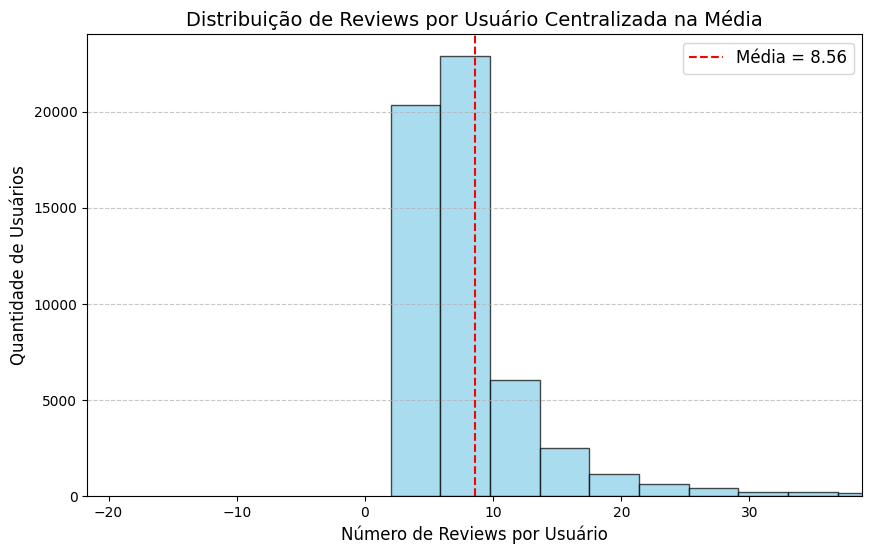

In [35]:
import matplotlib.pyplot as plt
import numpy as np

reviews_per_user = df_ordenado['reviewerID'].value_counts()

mean_reviews = reviews_per_user.mean()

plt.figure(figsize=(10, 6))
plt.hist(reviews_per_user, bins=200, edgecolor='black', color='skyblue', alpha=0.7)
plt.axvline(mean_reviews, color='red', linestyle='--', label=f'Média = {mean_reviews:.2f}')

# A ideia é centralizar na média para ficar mais bonito o gráfico
plt.xlim(mean_reviews - 3 * reviews_per_user.std(), mean_reviews + 3 * reviews_per_user.std())

plt.title('Distribuição de Reviews por Usuário Centralizada na Média', fontsize=14)
plt.xlabel('Número de Reviews por Usuário', fontsize=12)
plt.ylabel('Quantidade de Usuários', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [133]:
import pandas as pd
import numpy as np

TEST_PROPORTION = 0.25


def split_train_test(df, test_proportion):
    train_data = []
    test_data = []
    
    # Agrupamos o dataset por usuário
    grouped = df.groupby("reviewerID")
    
    # Iteramos cada conjunto de avaliação do usuário
    for reviewer, group in grouped:
        group = group.reset_index(drop=True)
        
        n_total = len(group)
        # Daqui tiramos a quantidade de avaliações que irão para o split de teste
        # baseado na proporção escolhida
        n_test = max(1, int(np.floor(n_total * test_proportion)))
        
        # Pegamos as últimas "n_test" avaliações para o split de teste
        # justamente para deixar as "anteriores" para o treino, e as 
        # "futuras" para o teste, dando coerência às métricas
        test_split = group.iloc[-n_test:]
        train_split = group.iloc[:-n_test]
        
        train_data.append(train_split)
        test_data.append(test_split)
    
    # Concatenar cada split de usuário em splist gerais
    train_data = pd.concat(train_data).reset_index(drop=True)
    test_data = pd.concat(test_data).reset_index(drop=True)
    
    return train_data, test_data

train, test = split_train_test(df_ordenado, TEST_PROPORTION)

print(f"Tamanho do treino: {len(train)}")
print(f"Tamanho do teste: {len(test)}")
print(f'Usuários únicos no treino: {train["reviewerID"].nunique()}')
print(f'Usuários únicos no teste: {test["reviewerID"].nunique()}')


Tamanho do treino: 373506
Tamanho do teste: 99230
Usuários únicos no treino: 55216
Usuários únicos no teste: 55216


## a) (2,0 pontos) Modelo de recomendação com filtragem colaborativa**

In [144]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from scipy.sparse import csr_matrix


'''Aqui vamos criar uma matriz de usuários por itens, onde cada linha é um usuário e cada coluna é um item. Essa matriz é preenchida com o overall que o usuário i deu para o item j.'''


user_item_matrix = train.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)

In [172]:
'''Estamos calculando a similaridade de cosseno (mede direção dos vetores no espaço, o que faz mais sentido para nosso problema), no fim, temos uma matriz onde (i, j) 
é a similaridade entre o usuário i e o usuário j'''

user_item_sparse = csr_matrix(user_item_matrix.values)
user_similarity_sparse = cosine_similarity(user_item_sparse, dense_output=False)

In [146]:
'''identificamos os usuários mais similares, calculando a relevância dos itens com base nas interações ponderadas desses vizinhos e removendo itens já avaliados pelo usuário.
Retornamod os top N itens mais relevantes ordenados por pontuação.'''

def recomendar_usuario_based(usuario_id, user_similarity_sparse, user_item_matrix, top_n=5, top_k_neighbors=10):
    user_idx = user_item_matrix.index.get_loc(usuario_id)
    
    similar_users = user_similarity_sparse[user_idx].toarray().flatten()
    
    top_similar_users_idx = np.argsort(-similar_users)[1:top_k_neighbors+1]
    top_similar_users_scores = similar_users[top_similar_users_idx]
    
    similar_items = user_item_sparse[top_similar_users_idx].multiply(top_similar_users_scores[:, None]).mean(axis=0).A1
    
    itens_ja_avaliados = user_item_matrix.loc[usuario_id]
    recomendacoes = pd.Series(similar_items, index=user_item_matrix.columns)
    recomendacoes = recomendacoes[~itens_ja_avaliados.index.isin(itens_ja_avaliados[itens_ja_avaliados > 0].index)]
    
    return recomendacoes.sort_values(ascending=False).head(top_n)

In [170]:
usuario_id = 'AZZTOUKVTUMVM'
print(f'Produtos comprados: \n{train[train["reviewerID"] == usuario_id]["title_produto"].values}')
print('\nProdutos recomendados:')

products = recomendar_usuario_based(usuario_id, user_similarity_sparse, user_item_matrix)

for title in df_metadata[df_metadata['asin'].isin(products.index)]['title']:
    print(title)

Produtos comprados: 
['Nintendo Nunchuk Controller - White'
 'Ts-h943 Dvd-rom Drive for Xbox 360'
 'Xbox 360 Wireless Controller -  Camouflage'
 'Samsung TS-H943 Replacement DVD drive for XBox 360, MS28 Version']

Produtos recomendados:
Lego Batman
Xbox LIVE 12 Month Gold Membership Card
Angry Birds Star Wars - Xbox 360
Buyee 128MB Memory Card for Sony Playstation 2
Borderlands: The Pre-Sequel - Xbox 360


## **b) (2,0 pontos) Modelo de recomendação baseado em conteúdo**

### Modelo utilizando embeddings

In [ ]:
"""Vamos criar uma coluna que servirá com input ao modelo de embeddings, juntando tudo que achamos relevante para a recomendação, que é o título, a categoria e a marca do produto."""
df_metadata['input_text'] = df_metadata['title'] + ' - ' + df_metadata['brand'] + '\n' + df_metadata['category']

* Necessário conta na GCP com billing configurado
* Ativar API VertexAI
* Utilizar Google Cloud SDK:
  * Instalar a CLI do google: https://cloud.google.com/sdk/docs/install?hl=pt-br;
  * Ao executar automaticamente o gcloud init, será setado o usuário, o projeto, e a região default;

    ```
    gcloud auth application-default login
    gcloud config set project seu_project_id
    ```
    Pode ser que precise:

    ```
    gcloud config set billing/quota_project YOUR_PROJECT
    ```

In [37]:
import os, sys
import numpy as np
from numpy.typing import NDArray
from typing import List, Optional
from vertexai.language_models import TextEmbeddingInput, TextEmbeddingModel
import vertexai
from google.cloud import aiplatform
from numpy.typing import NDArray
import numpy as np


class EmbeddingVertexAI:
    def __init__(self):
        self.model_name = 'text-embedding-004'
        self.embedding_dim = 768
        self.embedding_model = TextEmbeddingModel.from_pretrained(self.model_name)

    @staticmethod
    def _batch_chunks(chunks: List[str], batch_size: int = 250):
        """A API tem o limite de 250 documentos por request para criar os embeddings"""
        for i in range(0, len(chunks), batch_size):
            yield chunks[i:i + batch_size]

    @staticmethod
    def _batch_inputs(inputs: List[TextEmbeddingInput], batch_size: int = 10):
        for i in range(0, len(inputs), batch_size):
            yield inputs[i:i + batch_size]

    def embed_documents(
            self, 
            chunks: List[str], 
            task: str = 'SEMANTIC_SIMILARITY',
    ) -> NDArray[np.float32]:
        """Embeds texts with a pre-trained, foundational model.
        Args:
            texts (List[str]): A list of texts to be embedded.
            task (str): The task type for embedding. Check the available tasks in the model's documentation.
            dimensionality (Optional[int]): The dimensionality of the output embeddings.
        Returns:
            List[List[float]]: A list of lists containing the embedding vectors for each input text
        """

        # A API tem o limite de 250 documentos por request para criar os embeddings
        # Então, é necessário dividir os documentos em batches
        batches: List[List[str]] = self._batch_chunks(chunks)
        all_embeddings = []
        for batch in batches:
            # Otimiza os embeddings conforme o tipo de task, melhorando, 
            # segundo a documentação, a qualidade dos embeddings
            inputs = [TextEmbeddingInput(chunk, task) for chunk in batch]
            kwargs = dict(output_dimensionality=self.embedding_dim) if self.embedding_dim else {}
            
            for inputs_batch in self._batch_inputs(inputs):
                embeddings = self.embedding_model.get_embeddings(inputs_batch, **kwargs)
                embeddings = np.array([embedding.values for embedding in embeddings], dtype=np.float32)
                all_embeddings.append(embeddings)

        embeddings = np.concatenate(all_embeddings, axis=0)

        return embeddings

In [38]:
import faiss
from pandas import DataFrame
import numpy as np
from typing import Tuple
from numpy import ndarray
from typing import List
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

class VectorStoreFaiss:

    def __init__(
            self, 
            encoder, 
            index_path: str = None,
            index_type: str = 'flat', 
    ):
        if index_path:
            self.index_path = index_path
        else:
            os.makedirs(os.path.join('data', 'vectorstore'), exist_ok=True)
            self.index_path = os.path.join('data', 'vectorstore')

        self.encoder = encoder
        self.vector_store = None
        self.index_type = index_type
        self.index_file = os.path.join(self.index_path, 'index.faiss')
        self.metadata_file = os.path.join(self.index_path, 'metadata.npy')  # Para armazenar títulos ou IDs
        
        if os.path.exists(self.index_file):
            self.index = self._read_index()
            self.metadata = np.load(self.metadata_file, allow_pickle=True).tolist()  # Carrega os metadados
        else:
            self.index = self._create_index(self.encoder.embedding_dim)
            self.metadata = []  # Lista para armazenar títulos ou IDs dos produtos

    def _create_index(self, embedding_dim: int):
        os.makedirs(self.index_path, exist_ok=True)

        if self.index_type == 'flat':
            return faiss.IndexFlatIP(embedding_dim)
        else:
            raise ValueError(f"Unknown index type: {self.index_type}")
        
    def _read_index(self):
        return faiss.read_index(self.index_file)
        
    def _save_index(self):
        faiss.write_index(self.index, self.index_file)
        np.save(self.metadata_file, self.metadata)  # Salva os metadados

    def add_products(self, chunks: List[str], product_titles: List[str]):
        # Gera embeddings a partir dos títulos dos produtos
        embeddings = self.encoder.embed_documents(chunks, task='SEMANTIC_SIMILARITY')
        embeddings = np.ascontiguousarray(embeddings)
        faiss.normalize_L2(embeddings)

        self.index.add(embeddings)
        self.metadata.extend(product_titles)  # Salva os títulos dos produtos
        self._save_index()

    def get_embedding_by_title(self, title: str) -> np.ndarray:
        # Busca o índice do título no metadata
        try:
            product_index = self.metadata.index(title)
            embedding = self.index.reconstruct(product_index)  # Recupera o embedding do FAISS
            return embedding
        except ValueError:
            raise ValueError(f"Produto '{title}' não encontrado no metadata.")

    def search_by_embedding(self, embedding: ndarray, k: int = 5) -> List[Tuple[str, float]]:
        embedding = embedding.reshape(1, -1)
        embedding = np.ascontiguousarray(embedding)
        faiss.normalize_L2(embedding)

        distances, indexes = self.index.search(embedding, k)

        # Mapeia os índices para os títulos/metadados dos produtos
        results = [
            (self.metadata[idx], distances[0][i]) for i, idx in enumerate(indexes[0]) if idx != -1
        ]
        return results


In [ ]:
encoder = EmbeddingVertexAI()
vector_store = VectorStoreFaiss(
    encoder=encoder,
)

# NÃO RODAR NOVAMENTE, POIS DEMORA MUITO, OS EMBEDDINGS JÁ ESTÃO NA PASTA DATA
# vector_store.add_products(df_metadata['input_text'].tolist(), df_metadata['title'].tolist())

Aqui pensamos na seguinte heuristica:
- Para cada produto avaliado pelo usuário, ponderamos o embedding referente a esse produto com o "overall" dado pelo usuário, como se fosse mais "relevante" para descobrir o perfil dele. Assim, agregamos fazendo uma media ponderada dos embeddings, e buscamos no vector store embeddings de produtos similares.

Abaixo, teste com uma amostra:

In [114]:
"""Garante que não serão recomendados produtos que o usuário já comprou"""

def get_mean_embedding_products_user(vector_store, user_id, train):
    user_products = train[train['reviewerID'] == user_id]
    bought_products = user_products['title_produto'].values

    user_product_embeddings = np.stack(
        [vector_store.get_embedding_by_title(title) for title in bought_products]
    )

    # media ponderada dos embeddings utilizando os respecitvos overral dados pelo usuário
    weighted_avg_embedding = (user_products['overall'] @ user_product_embeddings) / user_products['overall'].sum()
    weighted_avg_embedding = weighted_avg_embedding.astype(np.float32)


    return weighted_avg_embedding, bought_products

def recommend_based_content(vector_store, user_id, train, k=10) -> List[Tuple[str, float]]:
    recommended_products = []
    results = []
    current_k = k
    iteration = 1

    weighted_avg_embedding, bought_products = get_mean_embedding_products_user(vector_store, user_id, train)
    
    while len(recommended_products) < k:
        search_results = vector_store.search_by_embedding(weighted_avg_embedding, k=current_k)
        
        # Itera pelos resultados e adiciona apenas os produtos únicos
        for product, similarity in search_results:
            if product not in bought_products and product not in recommended_products:
                recommended_products.append(product)
                results.append((product, similarity))
            
            if len(recommended_products) >= k:
                break
        
        if len(recommended_products) < k:
            current_k += k 
            iteration += 1
    
    return results

print(f'Produtos comprados: \n{train[train["reviewerID"] == "AZZTOUKVTUMVM"]["title_produto"].values}')
print('\nProdutos recomendados:')
recommend_based_content(vector_store, user_id='AZZTOUKVTUMVM', train=train, k=10)


Produtos comprados: 
['Nintendo Nunchuk Controller - White'
 'Ts-h943 Dvd-rom Drive for Xbox 360'
 'Xbox 360 Wireless Controller -  Camouflage'
 'Samsung TS-H943 Replacement DVD drive for XBox 360, MS28 Version']

Produtos recomendados:


[('Xbox 360 Wireless Controller - White', np.float32(0.9059912)),
 ('Xbox 360 Wireless Controller - Arctic Camouflage', np.float32(0.89415985)),
 ('Microsoft Xbox 360 Controller for Windows - White', np.float32(0.89284164)),
 ('Xbox 360 Wireless Controller Black', np.float32(0.88940465)),
 ('Microsoft Xbox 360 Wired Controller', np.float32(0.8851712)),
 ('Xbox Wireless Controller - White', np.float32(0.8831497)),
 ('Xbox 360 Wireless Controller - White (Certified Refurbished)',
  np.float32(0.8812705)),
 ('Xbox 360 Wireless Controller (White)', np.float32(0.8807765)),
 ('Microsoft Xbox 360 Wireless Controller for Windows',
  np.float32(0.87921596)),
 ('Xbox 360 Wireless Controller - Matte Black', np.float32(0.87853956))]

## **c) (2,0 pontos) Modelo de recomendação aplicando a redução da dimensionalidade**

In [154]:
user_item_matrix = train.pivot(index='reviewerID', columns='asin', values='overall').fillna(0)

In [155]:
from scipy.sparse import csr_matrix
# Colocamos em uma matriz esparsa para rodar de forma mais otimizada
user_item_matrix_sparse = csr_matrix(user_item_matrix.values)
user_item_matrix_sparse.shape

(55216, 17365)

In [181]:
from sklearn.decomposition import TruncatedSVD

"""Aqui aplicamos a redução de dimensionalidade de fato, onde optamos 
por SVD, pois foi um dos métodos ensinados em aula.
O número de componentes foi empírico.
"""

svd = TruncatedSVD(n_components=100, random_state=42)
user_item_reduced = svd.fit_transform(user_item_matrix_sparse)

In [182]:
"""Calculamos a matriz de similaridade de cosseno, dessa vez com o espaço reduzido"""

user_similarity_sparse_reduced = cosine_similarity(user_item_reduced)

MemoryError: Unable to allocate 22.7 GiB for an array with shape (55216, 55216) and data type float64

In [ ]:
def recomendar_usuario_based_svd(usuario_id, user_similarity_sparse, user_item_matrix, top_n=5, top_k_neighbors=10):
    '''
    O processo agora é bem similar ao anterior, mas usando as similaridades calculadas no espaço reduzido.
    Aqui, os itens recomendados são ponderados pelas similaridades entre os usuários no espaço de características latentes.
    '''
    
    user_idx = user_item_matrix.index.get_loc(usuario_id)
    
    # Pega a similaridade do usuário com todos os outros usuários
    similar_users = user_similarity_sparse[user_idx].flatten()
    
    # Ordenando e pegando os top_k usuários mais similares
    # O "-similar_users" é para ordenar de forma decrescente, 
    # e o [1:] é para excluir o próprio usuário
    top_similar_users_idx = np.argsort(-similar_users)[1:top_k_neighbors+1]
    top_similar_users_scores = similar_users[top_similar_users_idx]
    
    # Pegando as avaliações dos usuários mais similares
    similar_users_ratings = user_item_matrix.iloc[top_similar_users_idx].values
    
    # Agregamos as avaliações dos usuários mais similares com a média ponderada das avaliações
    weighted_ratings = np.dot(top_similar_users_scores, similar_users_ratings) / np.sum(np.abs(top_similar_users_scores))

    # Itens já comprados pelo usuário são desconsiderados para evitar redundância
    itens_ja_avaliados = user_item_matrix.loc[usuario_id] > 0 
    recomendacoes = pd.Series(weighted_ratings, index=user_item_matrix.columns)
    recomendacoes = recomendacoes[~itens_ja_avaliados]
    
    return recomendacoes.sort_values(ascending=False).head(top_n)

## **(2,0 pontos) Análise das métricas**

In [149]:
def precision_at_k(recomendacoes, itens_reais, k=5):
    """
    Mede a proporção de itens relevantes entre os k itens recomendados.
    """
    hits = sum([1 for item in recomendacoes[:k] if item in itens_reais])
    return hits / k


def dcg_at_k(recomendacoes, itens_reais, k=5):
    """
    Avalia a qualidade do ranqueamento, dando mais peso aos itens relevantes nas primeiras posições.
    """
    relevancias = [1 if item in itens_reais else 0 for item in recomendacoes[:k]]
    return sum(rel / np.log2(idx + 2) for idx, rel in enumerate(relevancias))


def ndcg_at_k(recomendacoes, itens_reais, k=5):
    """
     Normaliza o DCG, comparando-o com o valor ideal (IDCG), para medir o quão próximo o ranqueamento está do ideal.
    """
    dcg = dcg_at_k(recomendacoes, itens_reais, k)
    idcg = sum(1 / np.log2(idx + 2) for idx in range(min(len(itens_reais), k)))
    return dcg / idcg if idcg > 0 else 0

## Filtragem Colaborativa

In [173]:
def avaliar_modelo(test, user_similarity_sparse, user_item_matrix, k_values=[5, 10], top_k_neighbors=10):
    """
    Avalia o modelo usando Precision@k e NDCG@k.
    """
    resultados = {'precision': {k: [] for k in k_values}, 'ndcg': {k: [] for k in k_values}}
    
    for i, usuario_id in enumerate(test['reviewerID'].unique()):
        
        if i % 1000 == 0:
            print(f'Processando usuário {i} de {len(test["reviewerID"].unique())}')
            if i != 0:
                print("Métricas de Avaliação:")
                for k in k_values:
                    print(f'precision@{k} = {np.mean(resultados['precision'][k])}')
                    print(f'ndcg@{k} = {np.mean(resultados['ndcg'][k])}')
        
        if usuario_id not in user_item_matrix.index:
            continue 
        
        recomendacoes = recomendar_usuario_based(
            usuario_id, user_similarity_sparse, user_item_matrix, top_n=max(k_values), top_k_neighbors=top_k_neighbors
        )
        
        itens_reais = test[test['reviewerID'] == usuario_id]['asin'].tolist()
        
        for k in k_values:
            resultados['precision'][k].append(precision_at_k(recomendacoes.index.tolist(), itens_reais, k))
            resultados['ndcg'][k].append(ndcg_at_k(recomendacoes.index.tolist(), itens_reais, k))
    
    medias = {
        f'precision@{k}': np.mean(resultados['precision'][k]) for k in k_values
    }
    medias.update({
        f'ndcg@{k}': np.mean(resultados['ndcg'][k]) for k in k_values
    })
    return medias

In [174]:
metricas = avaliar_modelo(test, user_similarity_sparse, user_item_matrix, k_values=[5, 10])
print("Métricas de Avaliação:")
for metrica, valor in metricas.items():
    print(f"{metrica}: {valor}")

Processando usuário 0 de 55216
Processando usuário 1000 de 55216
Métricas de Avaliação:
precision@5 = 0.009600000000000001
ndcg@5 = 0.027855812270937093
precision@10 = 0.0068
ndcg@10 = 0.03301712589768799
Processando usuário 2000 de 55216
Métricas de Avaliação:
precision@5 = 0.0103
ndcg@5 = 0.02898184862346803
precision@10 = 0.00725
ndcg@10 = 0.03391575855525817
Processando usuário 3000 de 55216
Métricas de Avaliação:
precision@5 = 0.010600000000000002
ndcg@5 = 0.030338001362545667
precision@10 = 0.0074333333333333335
ndcg@10 = 0.035033567286062585
Processando usuário 4000 de 55216
Métricas de Avaliação:
precision@5 = 0.01025
ndcg@5 = 0.029392559300774286
precision@10 = 0.007225
ndcg@10 = 0.03405874082542979
Processando usuário 5000 de 55216
Métricas de Avaliação:
precision@5 = 0.0102
ndcg@5 = 0.028749396767942186
precision@10 = 0.00716
ndcg@10 = 0.03329419197806049
Processando usuário 6000 de 55216
Métricas de Avaliação:
precision@5 = 0.010266666666666669
ndcg@5 = 0.028588657355875447

In [175]:
"""Métricas finais de filtragem colaborativa:"""
for metrica, valor in metricas.items():
    print(f"{metrica}: {valor}")

precision@5: 0.010004346566212694
precision@10: 0.007173645320197044
ndcg@5: 0.027412817033790792
ndcg@10: 0.03205446512336292


## Filtragem por Conteúdo

In [ ]:
def evaluate_content_recommendations(vector_store, train, test, k_values=[5, 10], top_k=10):
    """
    Avalia o modelo usando Precision@k e NDCG@k.
    """
    resultados = {'precision': {k: [] for k in k_values}, 'ndcg': {k: [] for k in k_values}}
    
    for i, usuario_id in enumerate(test['reviewerID'].unique()):
        
        if i % 1000 == 0:
            print(f'Processando usuário {i} de {len(test["reviewerID"].unique())}')
            if i != 0:
                print("Métricas de Avaliação:")
                for k in k_values:
                    print(f'precision@{k} = {np.mean(resultados['precision'][k])}')
                    print(f'ndcg@{k} = {np.mean(resultados['ndcg'][k])}')
        
        recomendacoes = recommend_based_content(vector_store, usuario_id, train, k=top_k)
        # Pega somente os títulos dos produtos
        recomendacoes = [rec[0] for rec in recomendacoes]
        
        itens_reais = test[test['reviewerID'] == usuario_id]['title_produto'].tolist()

        for k in k_values:
            resultados['precision'][k].append(precision_at_k(recomendacoes, itens_reais, k))
            resultados['ndcg'][k].append(ndcg_at_k(recomendacoes, itens_reais, k))        
    
    medias = {
        f'precision@{k}': np.mean(resultados['precision'][k]) for k in k_values
    }
    medias.update({
        f'ndcg@{k}': np.mean(resultados['ndcg'][k]) for k in k_values
    })
    return medias


content_based_metrics = evaluate_content_recommendations(vector_store, train, test)
print("Métricas de Avaliação:")
for metrica, valor in content_based_metrics.items():
    print(f"{metrica}: {valor}")

Processando usuário 0 de 55216
Processando usuário 1000 de 55216
Métricas de Avaliação:
precision@5 = 0.0058000000000000005
ndcg@5 = 0.014847322286158635
precision@10 = 0.005
ndcg@10 = 0.020056004986400176
Processando usuário 2000 de 55216
Métricas de Avaliação:
precision@5 = 0.0075
ndcg@5 = 0.01764082084225556
precision@10 = 0.005900000000000001
ndcg@10 = 0.022550455052158913
Processando usuário 3000 de 55216
Métricas de Avaliação:
precision@5 = 0.007
ndcg@5 = 0.016466225666260367
precision@10 = 0.005566666666666667
ndcg@10 = 0.020977495022610676
Processando usuário 4000 de 55216
Métricas de Avaliação:
precision@5 = 0.00675
ndcg@5 = 0.01607594673789636
precision@10 = 0.0054
ndcg@10 = 0.020572960072212248
Processando usuário 5000 de 55216
Métricas de Avaliação:
precision@5 = 0.006480000000000001
ndcg@5 = 0.015020216426407773
precision@10 = 0.0054800000000000005
ndcg@10 = 0.01986580276045995
Processando usuário 6000 de 55216
Métricas de Avaliação:
precision@5 = 0.0063999999999999994
ndc

In [128]:
"""Métricas finais de filtragem por conteúdo:"""
for metrica, valor in content_based_metrics.items():
    print(f"{metrica}: {valor}")

precision@5: 0.006251811069255289
precision@10: 0.005382497826716894
ndcg@5: 0.01481628211009455
ndcg@10: 0.019941867426799827


## Filtragem Colaborativa com Redução da Dimensionalidade

In [ ]:
# Calcule e informe as métricas para cada um dos modelos de recomendação desenvolvidos

# Utilize gráficos e tabelas sempre que considerar interessante

- **Conclusões (1,5 pontos)**

A métrica "precision@k" mede simplesmente a proporção de itens recomendados acertados em uma lista de recomendaçoes de tamanho k, ou seja, dado os dados de "treino" do algoritmo, quais das avaliações do usuários dos dados de teste estavam presentes nessa lista - o quanto o algoritmo recomendou corretamente? A métrica ndcg@k modifica essa métrica para que leve em consideração a posição dos itens recomendados, em relação aos acertos. Assim, os itens que foram acertados, mas foram recomendados nas últimas posições da lista de tamanho k, levam um desconto de pontuação maior do que se tivessem sido recomendados nas primeiras posições.

Dado a explicação das métricas, temos os seguintes resultados para cada modelo:
- Baseline:
    - ndcg@5:       0.0016818836315317604
    - ndcg@10:      0.003073280417540927
    - precision@5:  0.00016758439071103669
    - precision@10: 8.379219535551834e-05

- Filtragem Colaborativa:
    - ndcg@5: 0.027412817033790792
    - ndcg@10: 0.03205446512336292
    - precision@5: 0.010004346566212694
    - precision@10: 0.007173645320197044

- Filtragem por conteúdo:
    - ndcg@5: 0.01481628211009455
    - ndcg@10: 0.019941867426799827
    - precision@5: 0.006251811069255289
    - precision@10: 0.005382497826716894

- Filtragem Colaborativa com redução de dimensionalidade:


Vale lembrar que não sabemos qual split de treino e teste foram usados na baseline, nem como foram tratados, e muito provavelmente foram diferentes, então a comparação não é 100% válida se formos mais rígidos. Quanto ao nosso dataset, já foi explicado como foi feito a separação e limpeza. No entanto, a distância dele para os modelos foi considerável (pior que todos), então muito provavelmente os modelos propostos são realmente consideravelmente melhores, assim como a modelagem. 

A filtragem colaborativa funciona de tal forma que depende da quantidade disponível do histórico de avaliações, e por utilizar preferências de outros usuários para recomendar, consegue descobrir relações ocultas entre usuários e produtos, relações estas que uma filtragem por conteúdo, por exemplo, não consegue aproveitar. Provavelmente conta desses fatores, considerando que tínhamos um histórico até que minimamente significativo, a filtragem colaborativa conseguiu se sair melhor que a por conteúdo.
Algo a se notar na filtragem por conteúdo, é que ela fica tão presa ao que o usuário já comprou e avaliou e à semelhença desses itens com outros do catálogo, que não consegue representar tão bem as "imprevisibilidades" no comportamento do usuário, tendo um espaço de busca mais limitado e previsível. 

Nas amostras que utilizamos antes de avaliar cada algoritmo, por exemplo, vimos que dado que o usuário comprou e avaliou bem um controle de XBOX, a filtragem por conteúdo acabou recomendando outros controles de XBOX. Já a colaborativa conseguiu pegar uma relação que dado que ele comprou um controle de XBOX, provavelmente ele deve comprar um jogo para jogar em seguida; por isso, recomendou jogos e a assinatura do XBOX -> e quase acertou! Recomendou em primeira prioridade o jogo Lego Batman, enquanto o produto realmente comprado posteriormente foi Minecraft, mas foi bem mais próximo do que a por conteúdo, que simplesmente recomendou o mesmo controle de XBOX, só que com outra cor.

É claro que esses fatores não tornam a filtragem conteúdo obsoleta, visto que muitas vezes temos a tendência de comprar algo parecido novamente, ou algo muito próximo disso. Ela também é extremamente sensível ao que consideramos como características do produto, mas é difícil dizer o que realmente tem que ser levado em consideração ou não; mas considerando que ela bateu a baseline proposta, a modelagem realizada parece ser um caminho interessante. Além disso, ela sofre muito menos com o problema do "cold-start", que é quando não temos histórico relevante disponível o suficiente para montar um perfil de usuário, a ponto de conseguir recomendações relevantes para ele - afinal, não é necessário montar seu perfil nessa modalidade, mas apenas pegar as características do produto comprado (ou a média/soma das características, caso tenha mais que um produto), e recomendar os mais próximos dele. 

Diante de tudo isso, temos uma hipótese significativa do porquê a filtragem colaborativa conseguiu se sair melhor do que a por conteúdo, batendo-o em todas as métricas utilizadas.

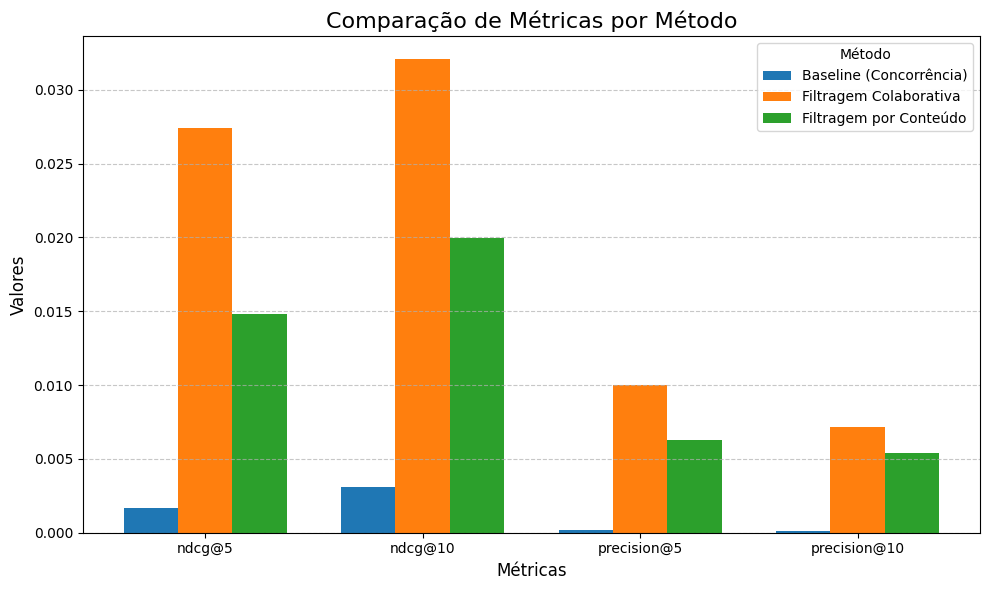

In [184]:
import matplotlib.pyplot as plt
import numpy as np

methods = ['Baseline (Concorrência)', 'Filtragem Colaborativa', 'Filtragem por Conteúdo']
metrics = ['ndcg@5', 'ndcg@10', 'precision@5', 'precision@10']
values = [
    [0.0016818836315317604, 0.003073280417540927, 0.00016758439071103669, 0.00008379219535551834],
    [0.027412817033790792, 0.03205446512336292, 0.010004346566212694, 0.007173645320197044],
    [0.01481628211009455, 0.019941867426799827, 0.006251811069255289, 0.005382497826716894]
]

x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

for i, method in enumerate(methods):
    ax.bar(x + i * width, values[i], width, label=method)

ax.set_title('Comparação de Métricas por Método', fontsize=16)
ax.set_xticks(x + width, metrics)
ax.set_xlabel('Métricas', fontsize=12)
ax.set_ylabel('Valores', fontsize=12)
ax.legend(title='Método', fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Insira suas conclusões aqui.

Dica: Informe as conclusões obtidas. Compare os valores das métricas obtidas entre os modelos e justifique qual seria o melhor modelo a ser utilizado no momento. Foque em convencer o gestor de que os seus modelos de recomendações são bons e qual seria o melhor a ser utilizado apresentando o motivo/justificativa.